In [21]:
import numpy as np
from numpy.random import randn
import pandas as pd

from pandas import Series, DataFrame

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [22]:
flight_dframe = DataFrame(sns.load_dataset('flights'))

In [23]:
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [24]:
flight_dframe = flight_dframe.pivot('month', 'year', 'passengers')

In [25]:
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


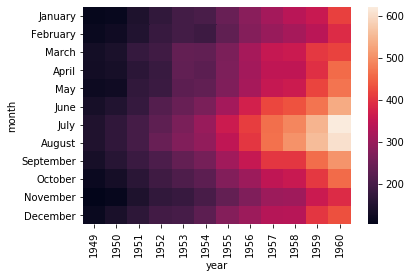

In [26]:
sns.heatmap(flight_dframe)

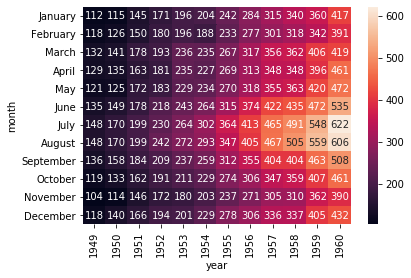

In [27]:
#giving annotation

sns.heatmap(flight_dframe, annot= True, fmt='d')

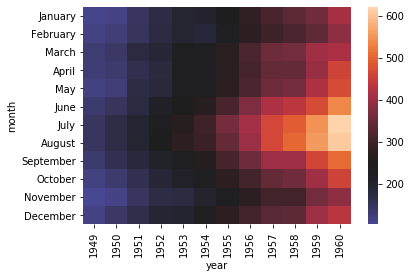

In [30]:
# we can choose our own 'center' for our colormap

sns.heatmap(flight_dframe, center=flight_dframe.loc['January',1955])

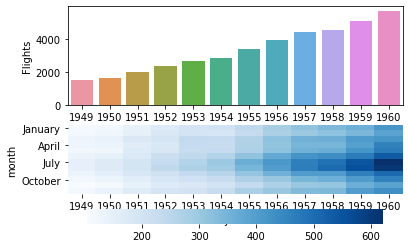

In [32]:
# heatmap() can be used on an axes for a subplot to create more informative figures
f, (axis1,axis2) = plt.subplots(2,1)

yearly_flights = flight_dframe.sum()

# Since yearly_flights is a weird format, we'll have to grab the values we want with a Series, then put them in a dframe

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values) 
flights = pd.DataFrame(flights)

# Make the dframe and name columns
year_dframe = pd.concat((years,flights),axis=1)
year_dframe.columns = ['Year','Flights']



# Create the bar plot on top
sns.barplot('Year',y='Flights',data=year_dframe, ax = axis1)

# Create the heatmap on bottom
sns.heatmap(flight_dframe,cmap='Blues',ax=axis2,cbar_kws={"orientation": "horizontal"})

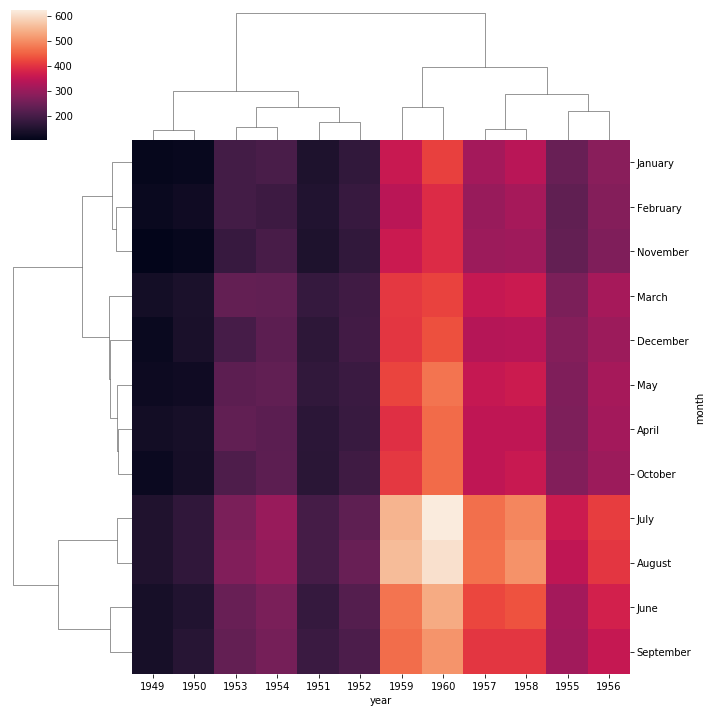

In [35]:
#about the clustermap

#clustermap will reformat the heatmap so similar rows are next to each other
sns.clustermap(flight_dframe)

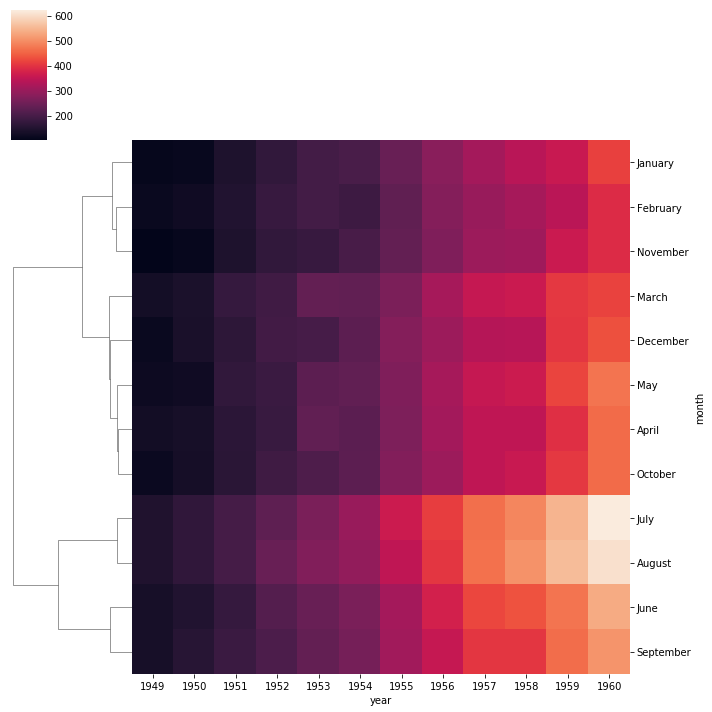

In [36]:
#uncluster the columns

sns.clustermap(flight_dframe, col_cluster=False)

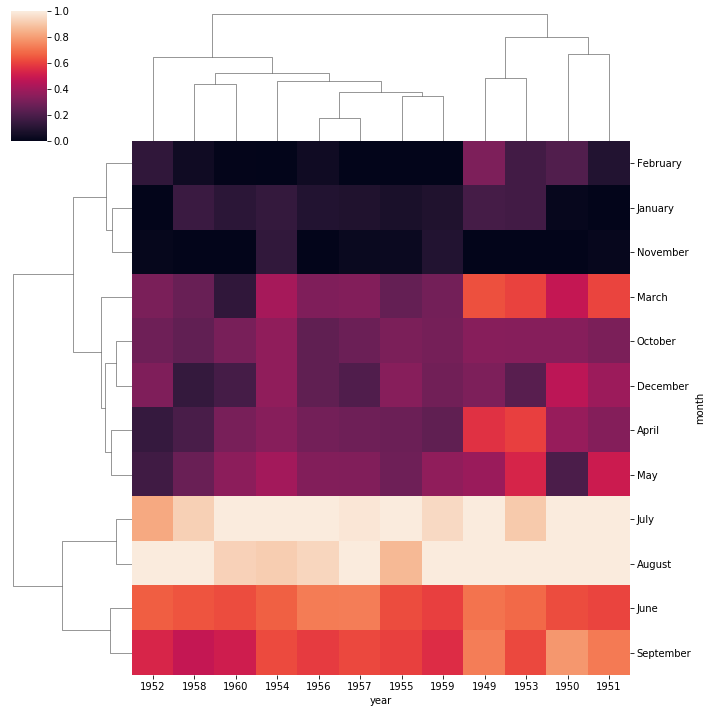

In [37]:
#since the no: of flight increase every year, we should set a standard scale

sns.clustermap(flight_dframe, standard_scale=1)

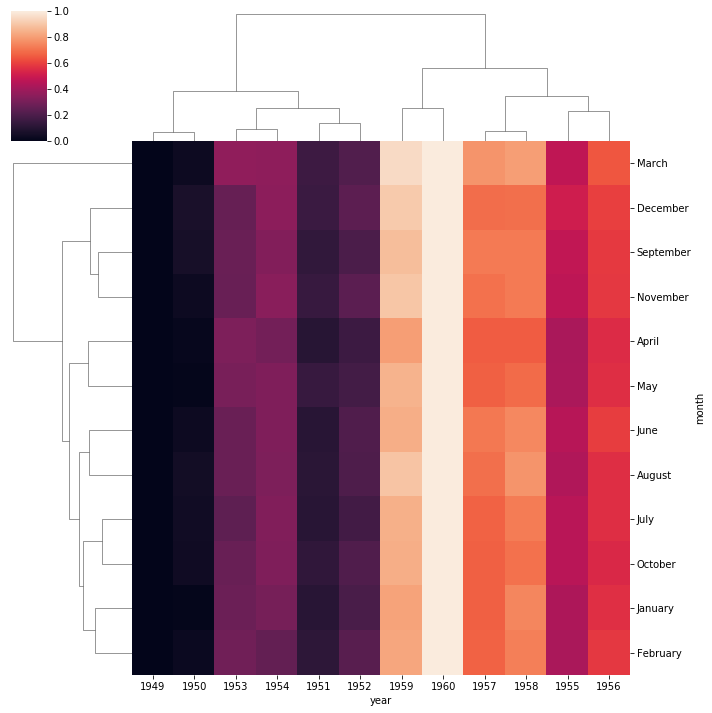

In [38]:
# scale the rows
sns.clustermap(flight_dframe, standard_scale=0)

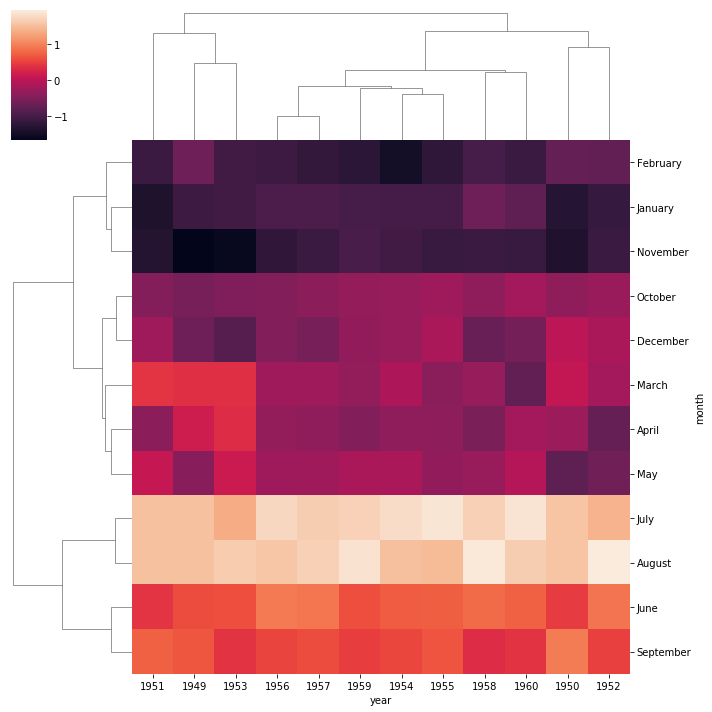

In [39]:
#this subtracts the mean and devides by the STD of each column, then the rows have a mean of 0 and a variance of 1
sns.clustermap(flight_dframe, z_score=1)